# 1. Loading the breast cancer dataset and splitting it 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
x,y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


# 2. Traing the dataset

## 2.1 Using Gaussian Naive Bayes

In [3]:
# importing gaussian naive bayes then creating a gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# training and testing the model
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [4]:
print("Number of mis-classified points out of a total of %d points : %d" % (x_test.shape[0] , (y_test != y_pred).sum()))

Number of mis-classified points out of a total of 171 points : 13


## 2.2 Using Support Vector Machine

In [5]:
# importing svm then creating an svm classifier
from sklearn import svm
from sklearn import metrics

clf_svm = svm.SVC(gamma="auto")
clf_svm.fit(x_train, y_train).predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
err_svm = 1.0 - metrics.accuracy_score(y_test, clf_svm.predict(x_test))
print("the error of the svm method  = ", err_svm)
print("Number of mis-classified points : ",int(err_svm * x_test.shape[0]))

the error of the svm method  =  0.368421052631579
Number of mis-classified points :  63


## 2.3 Using Decision Trees

In [7]:
# importing the necessary decision trees packages
from sklearn import tree
from matplotlib import pyplot as plt

In [8]:
# Creating the decision tree classifier using the entropy classifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
# Training the classifier
clf_tree = clf_tree.fit(x_train, y_train)

In [9]:
# Running the prediciton
y_pred = clf_tree.predict(x_test)

In [10]:
# Calculating the error
err_tree = 1.0 - metrics.accuracy_score(y_test, y_pred)
print("the error of the decision trees method  = ", err_tree)
print("Number of mis-classified points : ",int(err_tree * x_test.shape[0]))

the error of the decision trees method  =  0.04678362573099415
Number of mis-classified points :  8


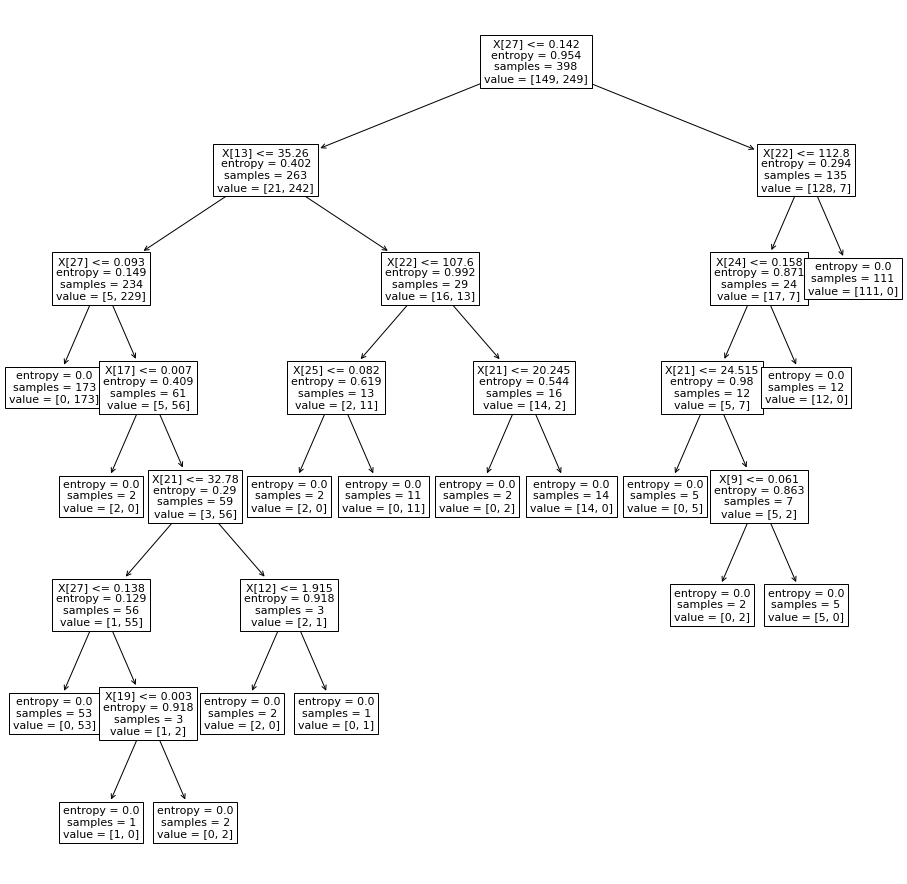

In [11]:
plt.figure(figsize=(16,16))  # set plot size (denoted in inches)
tree.plot_tree(clf_tree, fontsize=11)
plt.show()

## 2.4 Using Random Forrests

In [12]:
# importing the necessary random forest packages
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Creating the random forest classifier using 12 decision trees and the entropy criterion
clf_rf = RandomForestClassifier(n_estimators = 12, criterion="entropy", random_state=0)
# Training the classifier
clf_rf = clf_rf.fit(x_train, y_train)

In [14]:
# Running the prediction 
y_pred = clf_rf.predict(x_test)

In [15]:
err_rf = 1.0 - metrics.accuracy_score(y_test, y_pred)
print("the error of the random forrest method  = ", err_rf)
print("Number of mis-classified points : ",int(err_rf * x_test.shape[0]))

the error of the random forrest method  =  0.03508771929824561
Number of mis-classified points :  6


## 3. Conclusion

Comparing the number of the mis-classified points of the four methods, the one that has the least value is the <b>Random Forest</b> method.